# Khám phá dữ liệu qua các câu hỏi và câu trả lời


In [1]:
# import những thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Đọc dữ liệu đã tiền xử lý ở phần trước
df = pd.read_csv('../data/cleaned_dataset.csv')
df.sample(5)

,Khu vực tuyển,Thời gian thử việc,Cấp bậc,Yêu cầu giới tính,Số lượng tuyển,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Quy mô công ty,Loại công ty,Mức lương tối thiểu,Mức lương tối đa,Mức lương trung bình,Tuổi thấp nhất,Tuổi cao nhất,Tuổi trung bình
2273,TP.HCM,1.000000,Chuyên viên- nhân viên,Nam,5,Toàn thời gian cố định,Cao đẳng,2 năm,Khoa học - Kỹ thuật/Vận hành - Bảo trì - Bảo d...,10 - 150 người,2,10.0,15.0,12.5,25.000000,45.000000,35.000000
3064,Hà Nội,1.800000,Chuyên viên- nhân viên,Không yêu cầu,2,Toàn thời gian cố định,Trung cấp,Dưới 1 năm,Y tế - Chăm sóc sức khỏe/Bán hàng - Kinh doanh...,Trên 300 người,1,7.0,18.0,12.5,21.000000,36.000000,28.500000
4583,Bà Rịa - Vũng Tàu,1.000000,Chuyên viên- nhân viên,Không yêu cầu,5,Toàn thời gian cố định,Đại học,3 năm,Xây dựng/Khoa học - Kỹ thuật/Điện - Điện tử - ...,150 - 300 người,1,15.0,20.0,17.5,26.000000,45.000000,35.500000
4725,"Hưng Yên, Hải Phòng, Quảng Ninh",1.815368,Chuyên viên- nhân viên,Nam,5,Toàn thời gian cố định,Đại học,5 năm,Xây dựng/Điện - Điện tử - Điện lạnh,Trên 300 người,2,20.0,27.0,23.5,22.487626,36.139211,29.313418
3979,Hà Nội,2.000000,Chuyên viên- nhân viên,Không yêu cầu,1,Toàn thời gian cố định,Cao đẳng,3 năm,Kế toán,Dưới 10 người,1,10.0,14.0,12.0,24.000000,35.000000,29.500000


## 1. Khám phá dữ liệu

- Các ngành nghề đăng tin tuyển dụng là các ngành nào?

In [3]:
carreer = pd.Series(df['Ngành nghề'].str.split('/').explode().str.strip())
num_carreer = carreer.nunique()
print('Số ngành nghề: ', num_carreer)
carreer_value = pd.DataFrame(carreer.value_counts())
carreer_value.reset_index(inplace=True)
carreer_value.columns = ['Ngành nghề', 'Số lượng']
carreer_value

Số ngành nghề:  53


,Ngành nghề,Số lượng
0,Bán hàng - Kinh doanh,1812
1,Chăm sóc khách hàng,754
2,Kế toán,708
3,Bán sỉ - Bán lẻ - Quản lý cửa hàng,686
4,Hành chính - Thư ký,610
5,Marketing,562
6,Khoa học - Kỹ thuật,469
7,Xây dựng,417
8,Tài chính - Đầu tư - Chứng Khoán,374
9,Kiểm toán,334


- Xét 10 ngành nghề có số lượng công việc tuyển cao nhất

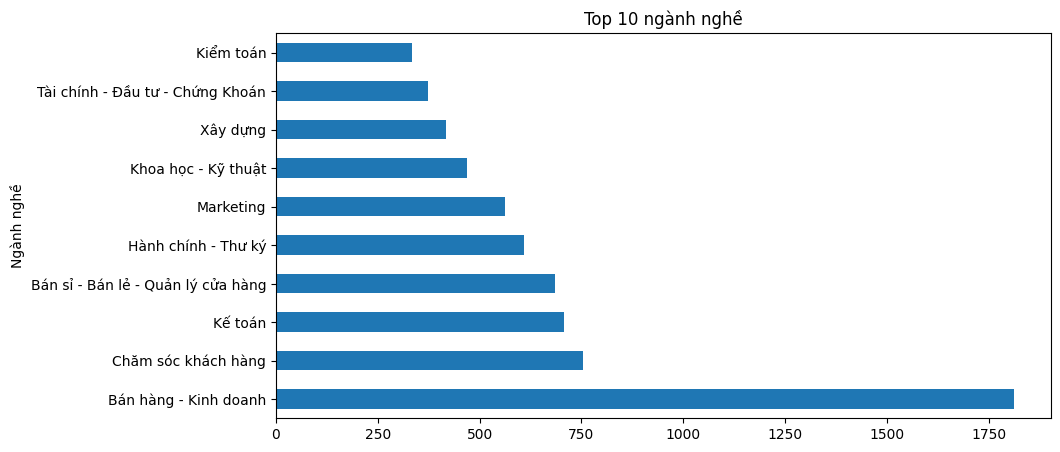

In [4]:
top10_carreer = carreer.value_counts().head(10)
top10_carreer.plot(kind='barh', figsize=(10, 5), title='Top 10 ngành nghề');

- Các công việc này sẽ có yêu cầu bằng cấp như thế nào?

In [5]:
degree_requirements = pd.DataFrame(df['Yêu cầu bằng cấp'].value_counts())
degree_requirements.reset_index(inplace=True)
degree_requirements.columns = ['Yêu cầu bằng cấp', 'Số lượng']
degree_requirements

,Yêu cầu bằng cấp,Số lượng
0,Cao đẳng,1817
1,Đại học,1057
2,Trung cấp,957
3,Không,628
4,Trung học,536
5,Chứng chỉ,64
6,Trên đại học,5


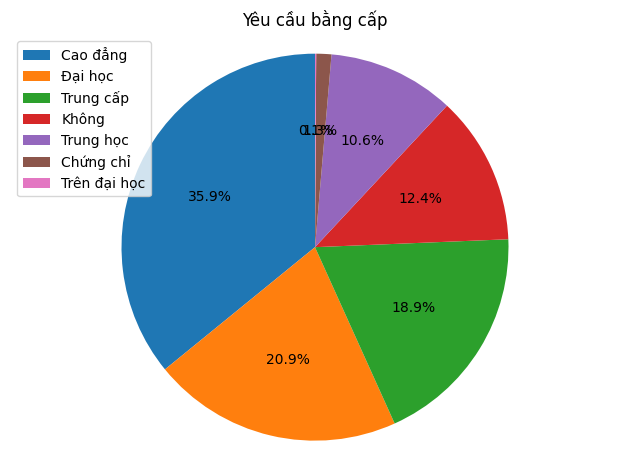

In [6]:
labels = degree_requirements['Yêu cầu bằng cấp']
sizes = degree_requirements['Số lượng']
plt.pie(sizes, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Yêu cầu bằng cấp')
plt.tight_layout()
plt.legend(labels, loc='best')
plt.show()

- Các công việc này có yêu cầu về kinh nghiệm làm việc không?

In [7]:
exp_requirements = pd.DataFrame(df['Yêu cầu kinh nghiệm'].value_counts())
exp_requirements.reset_index(inplace=True)
exp_requirements.columns = ['Yêu cầu kinh nghiệm', 'Số lượng']
exp_requirements

,Yêu cầu kinh nghiệm,Số lượng
0,1 năm,1741
1,Chưa có kinh nghiệm,1114
2,2 năm,881
3,Dưới 1 năm,739
4,3 năm,413
5,5 năm,106
6,Hơn 5 năm,44
7,4 năm,26


- Các cấp bậc tuyển là các cấp bậc nào?

In [8]:
level_df = pd.DataFrame(df['Cấp bậc'].value_counts())
level_df.reset_index(inplace=True)
level_df.columns = ['Cấp bậc', 'Số lượng']
level_df

,Cấp bậc,Số lượng
0,Chuyên viên- nhân viên,4318
1,Quản lý nhóm- giám sát,296
2,Quản lý cấp trung,245
3,Cộng tác viên,139
4,Quản lý cấp cao,42
5,Chuyên gia,23
6,Chưa cập nhật,1


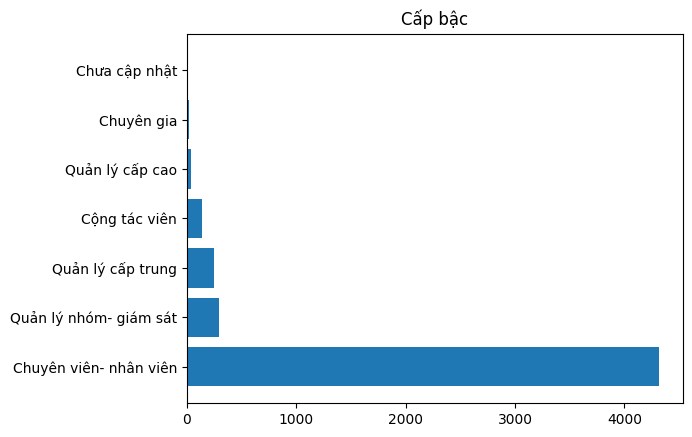

In [9]:
labels = level_df['Cấp bậc']
sizes = level_df['Số lượng']
plt.barh(labels, sizes)
plt.title('Cấp bậc')
plt.show()

- Yêu cầu về giới tính của các công việc

In [10]:
gender_df = pd.DataFrame(df['Yêu cầu giới tính'].value_counts())
gender_df.reset_index(inplace=True)
gender_df.columns = ['Giới tính', 'Số lượng']
gender_df

,Giới tính,Số lượng
0,Không yêu cầu,3296
1,Nam,1097
2,Nữ,671


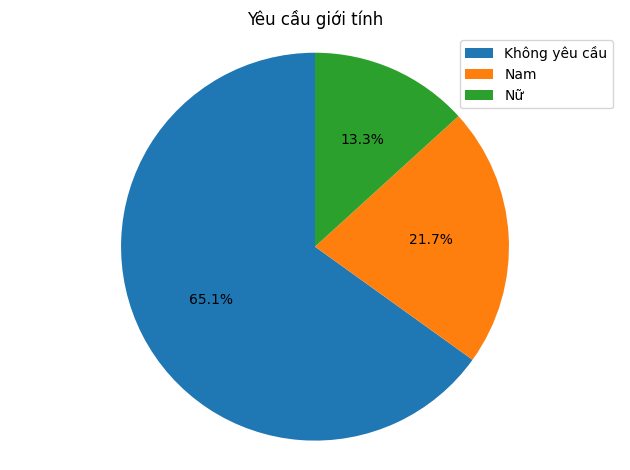

In [11]:
labels = gender_df['Giới tính']
sizes = gender_df['Số lượng']
plt.pie(sizes, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Yêu cầu giới tính')
plt.tight_layout()
plt.legend(labels, loc='best')
plt.show()

- Độ tuổi trung bình tuyển nhân sự của các công việc 

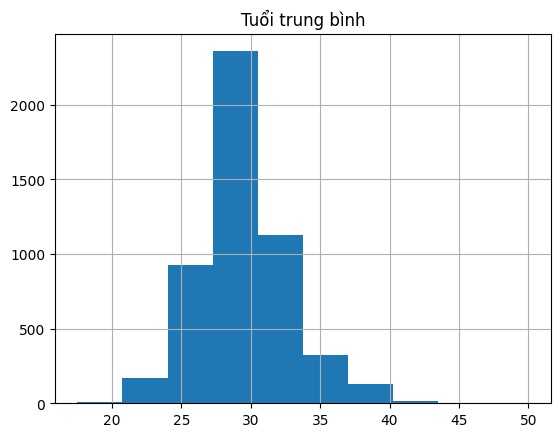

In [12]:
avg_age_df = pd.DataFrame(df['Tuổi trung bình'])
avg_age_df.hist(bins=10)
plt.title('Tuổi trung bình')
plt.show()

In [13]:
area_df = pd.Series(df['Khu vực tuyển']).str.split(',').explode().str.strip()
area_df = pd.DataFrame(area_df.value_counts())
area_df.reset_index(inplace=True)
area_df.columns = ['Khu vực', 'Số lượng']
area_df

,Khu vực,Số lượng
0,TP.HCM,2500
1,Hà Nội,1355
2,Bình Dương,402
3,Đồng Nai,173
4,Long An,157
...,...,...
59,Yên Bái,4
60,Hà Giang,3
61,Nước ngoài,2
62,Bắc Kạn,1


- Xét 10 khu vực có số lượng công việc tuyển nhiều nhất

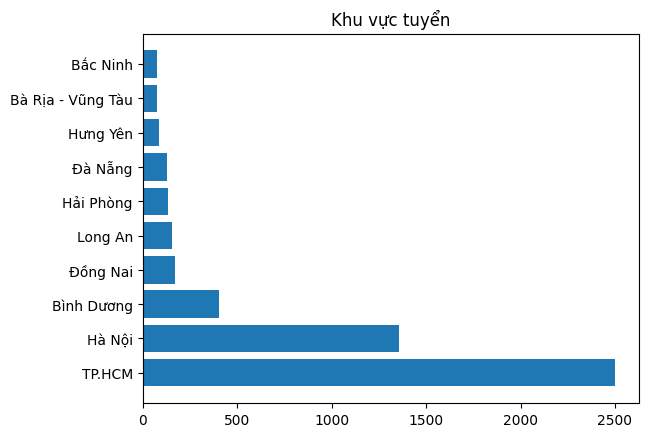

In [14]:
labels = area_df['Khu vực'].head(10)
sizes = area_df['Số lượng'].head(10)
plt.barh(labels, sizes)
plt.title('Khu vực tuyển')
plt.show()

## 2. Đặt câu hỏi và trả lời

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu hỏi 1. Có sự khác biệt trong lương đối với người có kinh nghiệm, bằng cấp khác nhau hay không ?
</b></font>

<font color="red"><b>Mục đích của câu hỏi: </b></font>  <font color="red">Cho người tìm việc làm hiểu được nhu cầu của thị trường có phù hợp với trình độ của mình hay không</font>


<font color="red"><b>Cách trả lời câu hỏi: </b></font>
<font color="red">
* Có 3 bước:
    * *Bước 1*: Đầu tiên, ta lọc các giá trị có ít dữ liệu trong dataset, như giá trị `4 năm`, `Hơn 5 năm` trong cột `Yêu cầu kinh nghiệm` và giá trị `Trên đại học`, `Chứng chỉ` trong cột `Yêu cầu bằng cấp`
    
    * *Bước 2*: Ta sẽ xử lí lọc các giá trị ngoại lại trong cột mức lương trung bình

    * *Bước 3*: Vẽ biểu đồ boxplot cho các dữ liệu đã được lọc
<font color="red"><b>Kết quả các bước làm: </b></font><font color="red">Biểu đồ boxplot về mức lương trung bình được groupby theo cột `Yêu cầu bằng cấp` và `Yêu cầu kinh nghiệm`</font>


</div>

In [15]:
# Tính IQR
df_copy = df[~df['Yêu cầu kinh nghiệm'].isin(['Hơn 5 năm', '4 năm'])]
Q1 = df_copy['Mức lương trung bình'].quantile(0.25)
Q3 = df_copy['Mức lương trung bình'].quantile(0.75)
IQR = Q3 - Q1

# Xác định các giới hạn của outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Loại bỏ outliers
df_avgsalary_by_exp = df_copy[(df_copy['Mức lương trung bình'] >= lower_bound) & (df_copy['Mức lương trung bình'] <= upper_bound)]

df_avgsalary_by_exp

,Khu vực tuyển,Thời gian thử việc,Cấp bậc,Yêu cầu giới tính,Số lượng tuyển,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Quy mô công ty,Loại công ty,Mức lương tối thiểu,Mức lương tối đa,Mức lương trung bình,Tuổi thấp nhất,Tuổi cao nhất,Tuổi trung bình
0,Hà Nội,2.000000,Chuyên viên- nhân viên,Không yêu cầu,20,Toàn thời gian cố định,Trung cấp,Chưa có kinh nghiệm,Hành chính - Thư ký/Chăm sóc khách hàng/Ngân hàng,Trên 300 người,2,7.0,10.0,8.50,23.400000,37.600000,30.500000
1,TP.HCM,1.000000,Chuyên viên- nhân viên,Nữ,1,Toàn thời gian cố định,Đại học,2 năm,Xuất Nhập Khẩu/Hành chính - Thư ký/Thu mua - K...,10 - 150 người,1,10.0,15.0,12.50,22.000000,40.000000,31.000000
2,Hà Nội,1.000000,Chuyên viên- nhân viên,Không yêu cầu,6,Toàn thời gian cố định,Không,Dưới 1 năm,Bán hàng - Kinh doanh/Hành chính - Thư ký/Điện...,10 - 150 người,2,10.0,30.0,20.00,22.400000,37.800000,30.100000
3,Tây Ninh,2.000000,Chuyên viên- nhân viên,Nữ,2,Toàn thời gian cố định,Đại học,Chưa có kinh nghiệm,Kế toán/Hành chính - Thư ký/Sản xuất - Lắp ráp...,10 - 150 người,1,10.0,15.0,12.50,22.000000,30.000000,26.000000
4,Bà Rịa - Vũng Tàu,2.000000,Chuyên viên- nhân viên,Không yêu cầu,1,Toàn thời gian cố định,Đại học,2 năm,Tài chính - Đầu tư - Chứng Khoán/Kế toán/Hành ...,Trên 300 người,2,10.0,20.0,15.00,22.000000,35.000000,28.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5057,Hà Nội,1.000000,Chuyên viên- nhân viên,Nam,5,Toàn thời gian cố định,Không,3 năm,Cơ khí - Ô tô - Tự động hóa,10 - 150 người,2,10.0,20.0,15.00,25.000000,35.000000,30.000000
5060,Bình Dương,1.000000,Chuyên viên- nhân viên,Nam,2,Toàn thời gian cố định,Trung học,1 năm,Cơ khí - Ô tô - Tự động hóa,150 - 300 người,2,8.0,10.0,9.00,20.000000,25.000000,22.500000
5061,Gia Lai,1.800000,Chuyên viên- nhân viên,Không yêu cầu,10,Toàn thời gian cố định,Không,Chưa có kinh nghiệm,Bán hàng - Kinh doanh/Cơ khí - Ô tô - Tự động hóa,10 - 150 người,1,4.5,20.0,12.25,18.000000,25.000000,21.500000
5062,TP.HCM,1.815368,Chuyên viên- nhân viên,Không yêu cầu,1,Toàn thời gian cố định,Cao đẳng,1 năm,Bán hàng - Kinh doanh/Cơ khí - Ô tô - Tự động hóa,10 - 150 người,1,15.0,25.0,20.00,22.487626,36.139211,29.313418


In [16]:
# Tính IQR
df_copy = df[~df['Yêu cầu bằng cấp'].isin(['Trên đại học', 'Chứng chỉ'])]
Q1 = df_copy['Mức lương trung bình'].quantile(0.25)
Q3 = df_copy['Mức lương trung bình'].quantile(0.75)
IQR = Q3 - Q1

# Xác định các giới hạn của outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Loại bỏ outliers
df_avgsalary_by_degree = df_copy[(df_copy['Mức lương trung bình'] >= lower_bound) & (df_copy['Mức lương trung bình'] <= upper_bound)]

df_avgsalary_by_degree


,Khu vực tuyển,Thời gian thử việc,Cấp bậc,Yêu cầu giới tính,Số lượng tuyển,Hình thức làm việc,Yêu cầu bằng cấp,Yêu cầu kinh nghiệm,Ngành nghề,Quy mô công ty,Loại công ty,Mức lương tối thiểu,Mức lương tối đa,Mức lương trung bình,Tuổi thấp nhất,Tuổi cao nhất,Tuổi trung bình
0,Hà Nội,2.000000,Chuyên viên- nhân viên,Không yêu cầu,20,Toàn thời gian cố định,Trung cấp,Chưa có kinh nghiệm,Hành chính - Thư ký/Chăm sóc khách hàng/Ngân hàng,Trên 300 người,2,7.0,10.0,8.50,23.400000,37.600000,30.500000
1,TP.HCM,1.000000,Chuyên viên- nhân viên,Nữ,1,Toàn thời gian cố định,Đại học,2 năm,Xuất Nhập Khẩu/Hành chính - Thư ký/Thu mua - K...,10 - 150 người,1,10.0,15.0,12.50,22.000000,40.000000,31.000000
2,Hà Nội,1.000000,Chuyên viên- nhân viên,Không yêu cầu,6,Toàn thời gian cố định,Không,Dưới 1 năm,Bán hàng - Kinh doanh/Hành chính - Thư ký/Điện...,10 - 150 người,2,10.0,30.0,20.00,22.400000,37.800000,30.100000
3,Tây Ninh,2.000000,Chuyên viên- nhân viên,Nữ,2,Toàn thời gian cố định,Đại học,Chưa có kinh nghiệm,Kế toán/Hành chính - Thư ký/Sản xuất - Lắp ráp...,10 - 150 người,1,10.0,15.0,12.50,22.000000,30.000000,26.000000
4,Bà Rịa - Vũng Tàu,2.000000,Chuyên viên- nhân viên,Không yêu cầu,1,Toàn thời gian cố định,Đại học,2 năm,Tài chính - Đầu tư - Chứng Khoán/Kế toán/Hành ...,Trên 300 người,2,10.0,20.0,15.00,22.000000,35.000000,28.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5058,Quảng Nam,1.815368,Chuyên viên- nhân viên,Nam,1,Toàn thời gian cố định,Cao đẳng,4 năm,Cơ khí - Ô tô - Tự động hóa,Trên 300 người,1,11.0,14.0,12.50,22.487626,36.139211,29.313418
5060,Bình Dương,1.000000,Chuyên viên- nhân viên,Nam,2,Toàn thời gian cố định,Trung học,1 năm,Cơ khí - Ô tô - Tự động hóa,150 - 300 người,2,8.0,10.0,9.00,20.000000,25.000000,22.500000
5061,Gia Lai,1.800000,Chuyên viên- nhân viên,Không yêu cầu,10,Toàn thời gian cố định,Không,Chưa có kinh nghiệm,Bán hàng - Kinh doanh/Cơ khí - Ô tô - Tự động hóa,10 - 150 người,1,4.5,20.0,12.25,18.000000,25.000000,21.500000
5062,TP.HCM,1.815368,Chuyên viên- nhân viên,Không yêu cầu,1,Toàn thời gian cố định,Cao đẳng,1 năm,Bán hàng - Kinh doanh/Cơ khí - Ô tô - Tự động hóa,10 - 150 người,1,15.0,25.0,20.00,22.487626,36.139211,29.313418


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=blue><b>Trực quan hoá
</b></font>


</div>

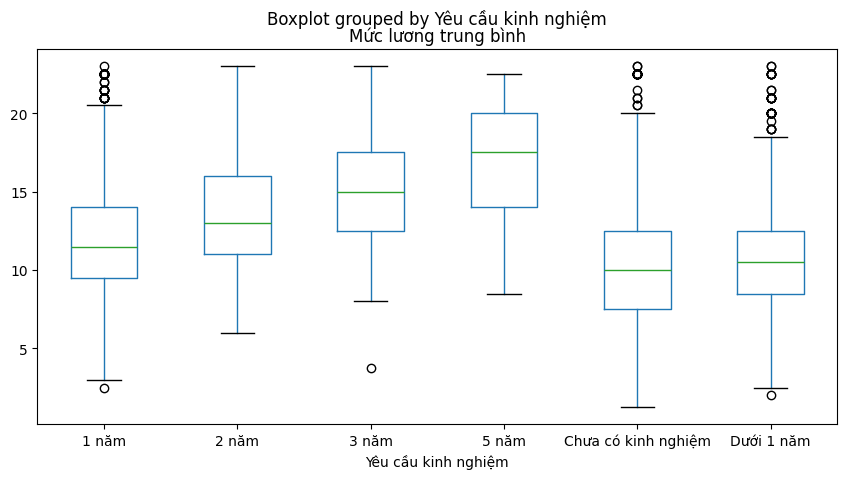

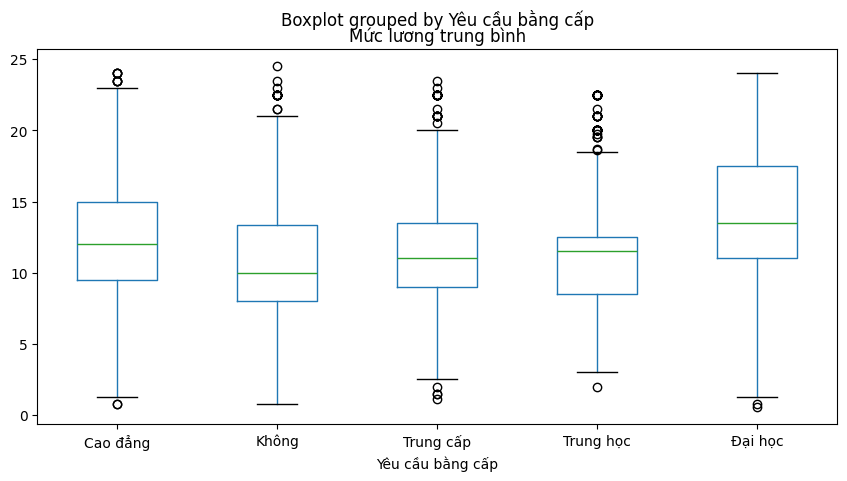

In [17]:
# Vẽ biểu đồ boxplot sau khi loại bỏ outliers
df_avgsalary_by_exp.boxplot(column='Mức lương trung bình', by='Yêu cầu kinh nghiệm', figsize=(10, 5), grid=False)
df_avgsalary_by_degree.boxplot(column='Mức lương trung bình', by='Yêu cầu bằng cấp', figsize=(10, 5), grid=False)
plt.show()

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Trả lời câu hỏi
</b></font>

<font color="red">
* Ở biểu đồ về <b>Kinh nghiệm</b>, dễ dàng nhận thấy với kinh nghiệm càng cao thì mức lương nhận được càng cao
* Ở biểu đồ về <b>Bằng cấp</b>, với bằng đại học thì mức lương được trỉa rộng nhất và cao nhất, các bằng cấp còn lại không khác biệt nhiều
</font>


</div>

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu hỏi 2. Khác biệt trong nhu cầu tuyển dụng ở các tỉnh thành khác nhau ?
</b></font>

<font color="red"><b>Mục đích của câu hỏi: </b></font>  <font color="red">Cho người tìm việc làm hiểu được nhu cầu của thị trường ở các địa phương cụ thể</font>


<font color="red"><b>Cách trả lời câu hỏi: </b></font>
<font color="red">
* Có 3 bước:

    *  Bước 1: Lần lượt tách tất cả các hàng dữ liệu khi tại hàng đó và cột cụ thể có chứa hơn 1 giá trị, ví dụ ở cột `Khu vực tuyển` có các hàng có giá trị là nhiều hơn 1 tỉnh, để làm việc này, nhóm sẽ tách các giá trị ở các hàng trong một cột theo giá trị ngăn cách như `/` hoặc `, `. Sau đó sẽ explode theo cột.

    *  Bước 2: Gom nhóm theo các cột dữ liệu `Khu vực tuyển`, `Ngành nghề`,và tính tổng ở cột `Số lượng tuyển` sau đó so sánh số lượng tuyển các ngành ở các tỉnh thành cụ thể. Ở đây nhóm sẽ xem xét ở 5 khu vực tuyển có số lượng tuyển nhiều nhất

    * Bước 3: Vẽ 5 biểu đồ cột để so sánh, vì có rất nhiều ngành nghề nên nhóm chỉ trực quan ở 5 ngành nghề có số lượng tuyển cao nhất<font color="red"></font>

<font color="red"><b>Kết quả các bước làm: </b></font><font color="red">5 biểu đồ cột đôi so sánh số lượng tuyển của các ngành nghề</font>


</div>

In [25]:
df_carreer=df.copy()
df_carreer['Ngành nghề'] = df_carreer['Ngành nghề'].str.split('/')
df_carreer = df_carreer.explode('Ngành nghề').reset_index(drop=True)
df_carreer['Khu vực tuyển'] = df_carreer['Khu vực tuyển'].str.split(', ')
df_carreer = df_carreer.explode('Khu vực tuyển').reset_index(drop=True)
#df_carreer=df_carreer.groupby(['Khu vực tuyển','Ngành nghề'])['Số lượng tuyển'].sum()
df_carreer
df_carreer.isnull().any()

Khu vực tuyển           False
Thời gian thử việc      False
Cấp bậc                 False
Yêu cầu giới tính       False
Số lượng tuyển          False
Hình thức làm việc      False
Yêu cầu bằng cấp        False
Yêu cầu kinh nghiệm     False
Ngành nghề              False
Quy mô công ty          False
Loại công ty            False
Mức lương tối thiểu     False
Mức lương tối đa        False
Mức lương trung bình    False
Tuổi thấp nhất          False
Tuổi cao nhất           False
Tuổi trung bình         False
dtype: bool

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=blue><b>Trực quan hoá
</b></font>


</div>

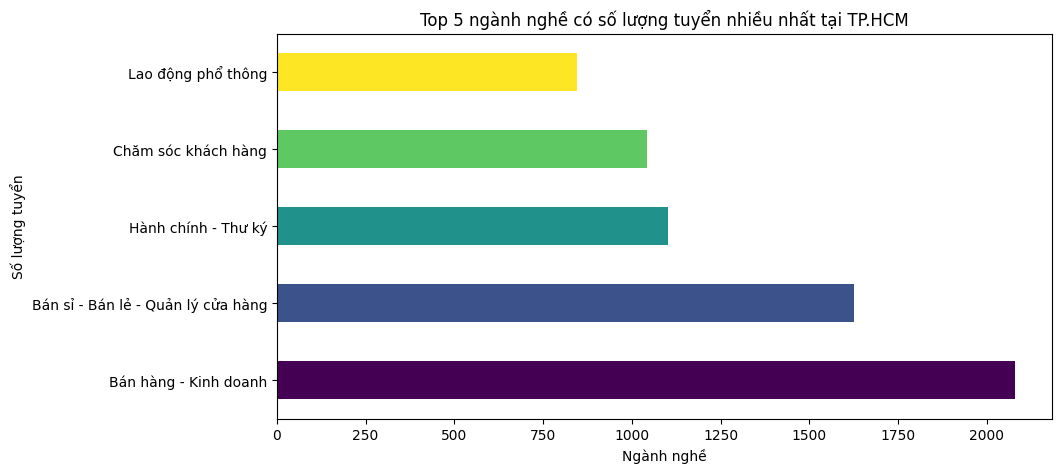

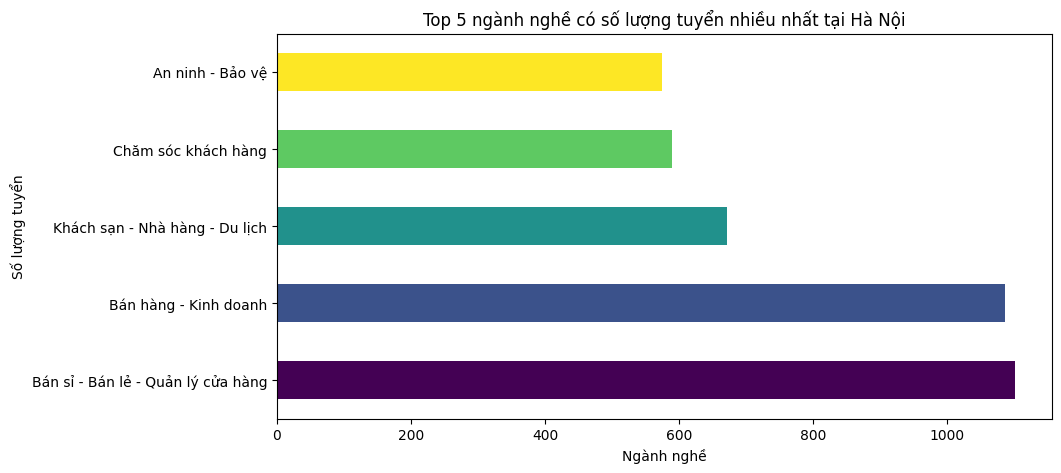

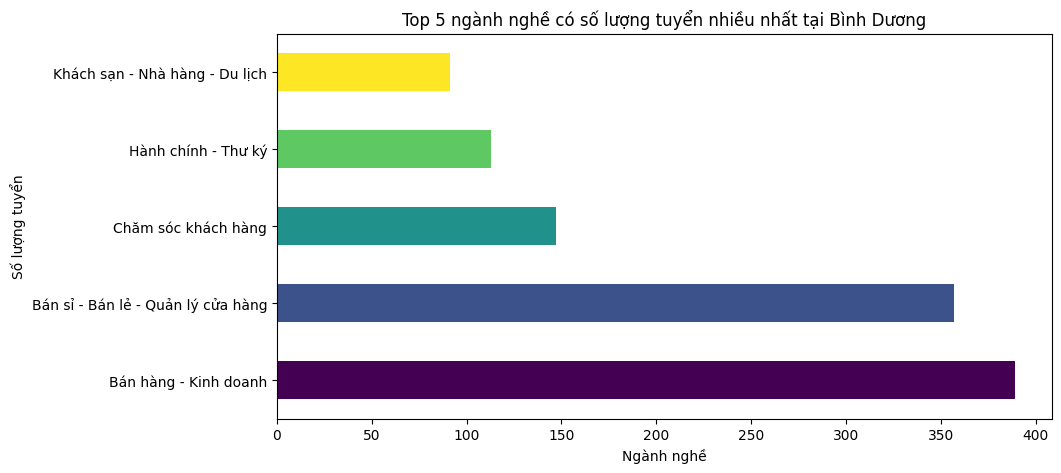

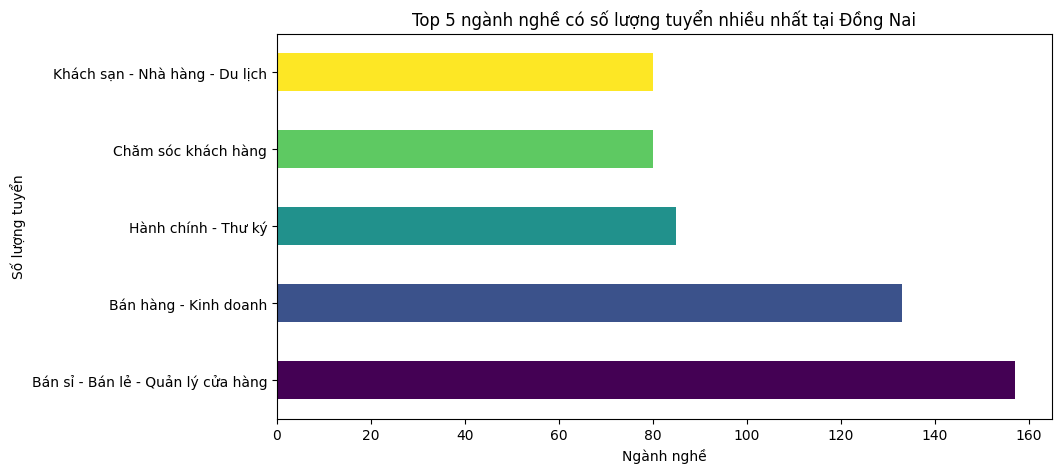

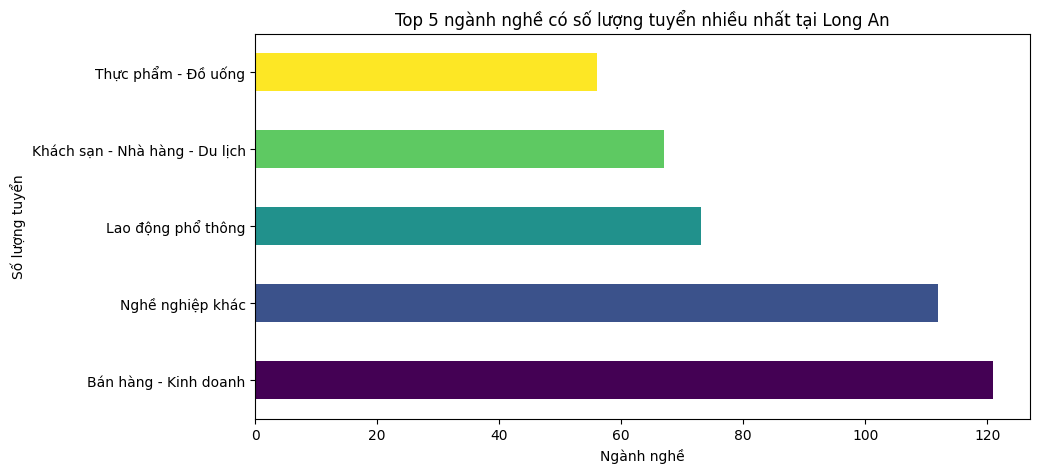

In [19]:
top5area=area_df['Khu vực'].head(5)
top5area

for area in top5area:
    # Lọc df_carreer cho mỗi khu vực
    df_carreer_filtered = df_carreer[df_carreer.index.get_level_values('Khu vực tuyển') == area]

    # Nhóm dữ liệu và tính tổng
    df_carreer_grouped = df_carreer_filtered.groupby('Ngành nghề').sum()

    # Sắp xếp dữ liệu và lấy 5 ngành nghề đầu tiên
    top5_careers = df_carreer_grouped.sort_values(ascending=False).head(5)

    # Vẽ biểu đồ cột
    colors = plt.cm.viridis(np.linspace(0, 1, len(top5_careers)))

    top5_careers.plot(kind='barh', figsize=(10, 5),color=colors)
    plt.title(f'Top 5 ngành nghề có số lượng tuyển nhiều nhất tại {area}')
    plt.xlabel('Ngành nghề')
    plt.ylabel('Số lượng tuyển')
    plt.show()

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Trả lời câu hỏi
</b></font>

<font color="red">

* Biểu đồ cho thấy giống như biểu đồ về tuyển dụng các ngành ở phần khám phá, ngành <b>Bán hàng - kinh doanh, Hành chính - Thư ký, Chăm sóc khách hàng </b> luôn có số lượng tuyển cao ở các tỉnh.

* Ngành <b>Khách sạn - Nhà hàng - Du lịch </b> xuất hiện ở 4/5 biểu đồ dù không phải nằm trong top 10 ngành có số lượng tuyển nhiều nhất cả nước

* Tại tỉnh <b>Long An</b>, <b> Nghề nghiệp khác</b> chiếm số lượng tuyển khá lớn - Đứng thứ 2 trong toàn bộ số lượng tuyển

* Các ngành nghề <b>Lao động phổ thông, Chăm sóc khách hàng</b> cũng có xuất hiện dù không nằm trong top 10 toàn quốc
</font>


</div>

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu hỏi 3. Cùng một điều kiện, liệu có sự khác biệt trong lương của nam và nữ không? 
</b></font>

<font color="red"><b>Mục đích của câu hỏi: </b></font>  <font color="red">Cho biết liệu có sự phân biệt giới tính nào trong công tác tuyển dụng của các công ty không, nếu có thì cần phải tìm cách khắc phục</font>


<font color="red"><b>Cách trả lời câu hỏi: </b></font>
<font color="red">3
* Có 2 bước:

    *  Bước 1: Lần lượt tách tất cả các hàng dữ liệu khi tại hàng đó và cột cụ thể có chứa hơn 1 giá trị, ví dụ ở cột `Khu vực tuyển` có các hàng có giá trị là nhiều hơn 1 tỉnh, để làm việc này, nhóm sẽ tách các giá trị ở các hàng trong một cột theo giá trị ngăn cách như `/` hoặc `, `. Sau đó sẽ explode theo cột.

    *  Bước 2: Gom nhóm theo các cột dữ liệu `Khu vực tuyển`, `Ngành nghề`, `Cấp bậc`, `Hình thức làm việc`, `Yêu cầu kinh nghiệm`, `Yêu cầu giới tính`, sau đó so sánh mức lương của nam và nữ. Ở đây nhóm sẽ xem xét ở 5 ngành nghề có lượng tuyển nhiều nhất

    * Bước 3: Vẽ biểu đồ cột để so sánh<font color="red"></font>

<font color="red"><b>Kết quả các bước làm: </b></font><font color="red">Biểu đồ cột đôi so sánh mức lương của nam và nữ trong cùng một điều kiện ở 5 ngành nghề có số lượng tuyển nhiều nhất</font>


</div>

In [24]:
df_copy=df.copy()
df_copy['Yêu cầu giới tính']=df_copy['Yêu cầu giới tính'].replace('Không yêu cầu','Nam, Nữ')
df_copy['Yêu cầu giới tính'] = df_copy['Yêu cầu giới tính'].str.split(', ')
df_copy = df_copy.explode('Yêu cầu giới tính').reset_index(drop=True)
df_copy['Ngành nghề']=df_copy['Ngành nghề'].str.split('/')
df_copy = df_copy.explode('Ngành nghề').reset_index(drop=True)
df_copy['Khu vực tuyển'] = df_copy['Khu vực tuyển'].str.split(', ')
df_copy = df_copy.explode('Khu vực tuyển').reset_index(drop=True)
df_copy=df_copy.groupby(['Khu vực tuyển','Ngành nghề','Cấp bậc','Hình thức làm việc','Yêu cầu bằng cấp','Yêu cầu kinh nghiệm','Yêu cầu giới tính'])['Mức lương trung bình'].mean().reset_index()


df_top10 = df_copy[df_copy['Ngành nghề'].isin(carreer_value.head(5)['Ngành nghề'])]


df_male = df_top10[df_top10['Yêu cầu giới tính'] == 'Nam']
df_female = df_top10[df_top10['Yêu cầu giới tính'] == 'Nữ']

average_male_salary = df_male.groupby('Ngành nghề')['Mức lương trung bình'].mean()
average_female_salary = df_female.groupby('Ngành nghề')['Mức lương trung bình'].mean()

average_female_salary



Khu vực tuyển           False
Thời gian thử việc      False
Cấp bậc                 False
Yêu cầu giới tính       False
Số lượng tuyển          False
Hình thức làm việc      False
Yêu cầu bằng cấp        False
Yêu cầu kinh nghiệm     False
Ngành nghề              False
Quy mô công ty          False
Loại công ty            False
Mức lương tối thiểu     False
Mức lương tối đa        False
Mức lương trung bình    False
Tuổi thấp nhất          False
Tuổi cao nhất           False
Tuổi trung bình         False
dtype: bool


Ngành nghề
Bán hàng - Kinh doanh                 14.989779
Bán sỉ - Bán lẻ - Quản lý cửa hàng    14.959176
Chăm sóc khách hàng                   14.986051
Hành chính - Thư ký                   12.193984
Kế toán                               12.152158
Name: Mức lương trung bình, dtype: float64

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=blue><b>Trực quan hoá
</b></font>


</div>

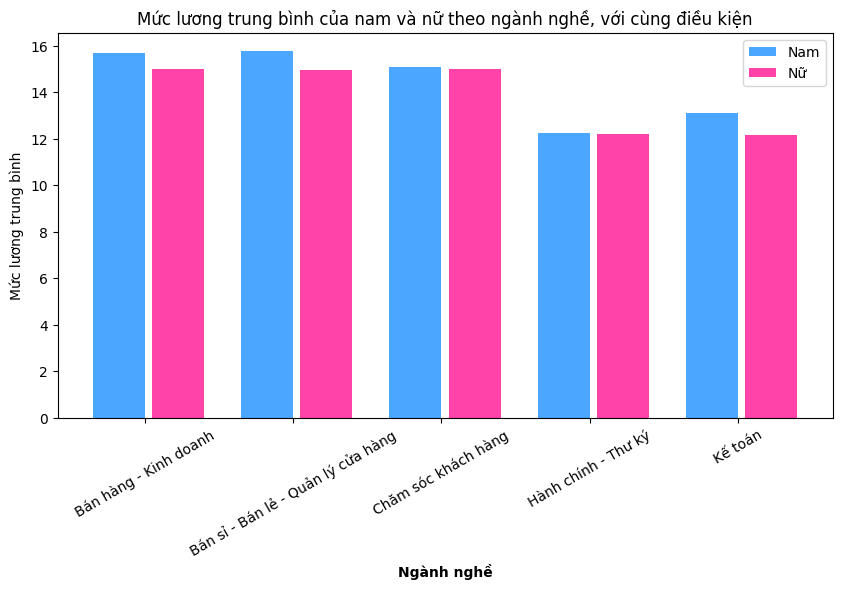

In [21]:
bar_width = 0.35

r1 = np.arange(len(average_male_salary))
r2 = [x + bar_width + 0.05 for x in r1]

plt.figure(figsize=(10, 5))

plt.bar(r1, average_male_salary.values, width=bar_width,color='dodgerblue', alpha=.8, label='Nam')
plt.bar(r2, average_female_salary.values, width=bar_width,color='deeppink',alpha=.8, label='Nữ')

plt.xlabel('Ngành nghề', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(average_male_salary))], average_male_salary.index, rotation=90)

plt.ylabel('Mức lương trung bình')
plt.title('Mức lương trung bình của nam và nữ theo ngành nghề, với cùng điều kiện')
plt.xticks(rotation=30)
plt.legend()
plt.show()


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Trả lời câu hỏi
</b></font>

<font color="red">Biểu đồ cho thấy mức lương của nam và nữ có sự chênh lệch cao hơn ở lương của nam giới trong tất cả 5 ngành đang xét nhưng chênh lệch không quá lớn. Việc này cho thấy vẫn có một sự phân biệt trong lương của nam và nữ</font>


</div>